In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def read_file_datatype(*args):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    df = pd.read_csv(*args)
    start_mem = df.memory_usage().sum() / 1024**2
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                #if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                #    df[col] = df[col].astype(np.float16)
                #el
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        #else:
            #df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB --> {:.2f} MB (Decreased by {:.1f}%)'.format(
        start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [3]:
df = read_file_datatype('datasets_748584_1294786_2015.csv')

Memory usage of dataframe is 0.01 MB --> 0.01 MB (Decreased by 43.4%)


In [4]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
df.shape

(158, 12)

In [8]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int16  
 3   Happiness Score                158 non-null    float32
 4   Standard Error                 158 non-null    float32
 5   Economy (GDP per Capita)       158 non-null    float32
 6   Family                         158 non-null    float32
 7   Health (Life Expectancy)       158 non-null    float32
 8   Freedom                        158 non-null    float32
 9   Trust (Government Corruption)  158 non-null    float32
 10  Generosity                     158 non-null    float32
 11  Dystopia Residual              158 non-null    float32
dtypes: float32(9), int16(1), object(2)
memory usage: 8

In [28]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037267,0.545808,0.856822,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158447,1.214405,0.811013,0.549092,0.180255,0.309882,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


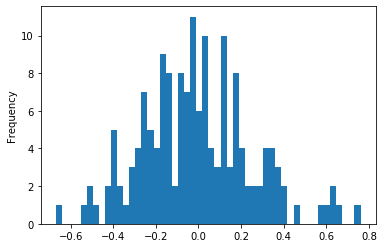

In [13]:
df['Family'].diff().plot(kind = 'hist', stacked = True, bins = 50)

# GDP vs Happiness score

Below visualisation shows trend between GDP and happiness score along with people's trust on Government.

From the visualisation we can understand that higher the GDP, more happier the peoplee this also

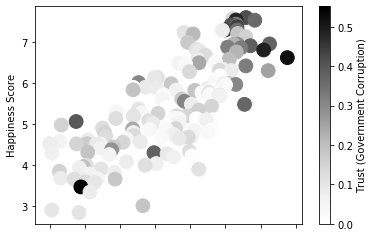

In [16]:
df.plot.scatter(x = 'Economy (GDP per Capita)', y = 'Happiness Score', c = 'Trust (Government Corruption)', s = 190)

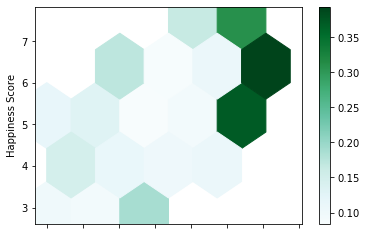

In [17]:
df.plot.hexbin(x = 'Economy (GDP per Capita)', y = 'Happiness Score', gridsize = 5, C = 'Trust (Government Corruption)')

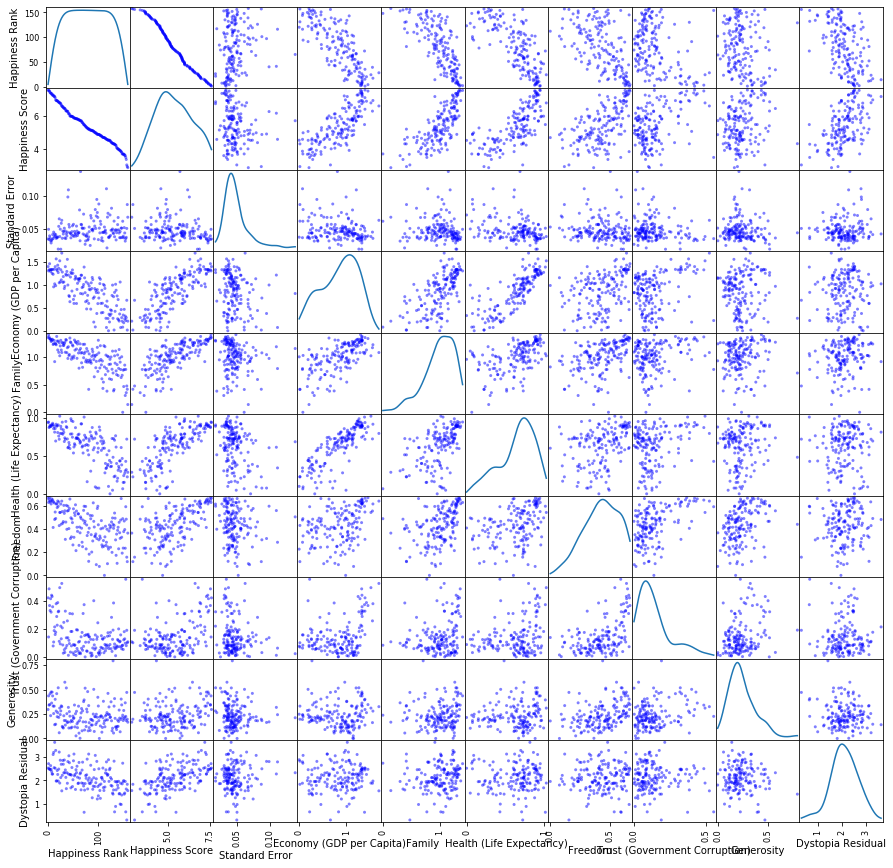

In [19]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize= (15,15), diagonal='kde', color = 'b')
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000201ED5A8AC8>,
      dtype=object)

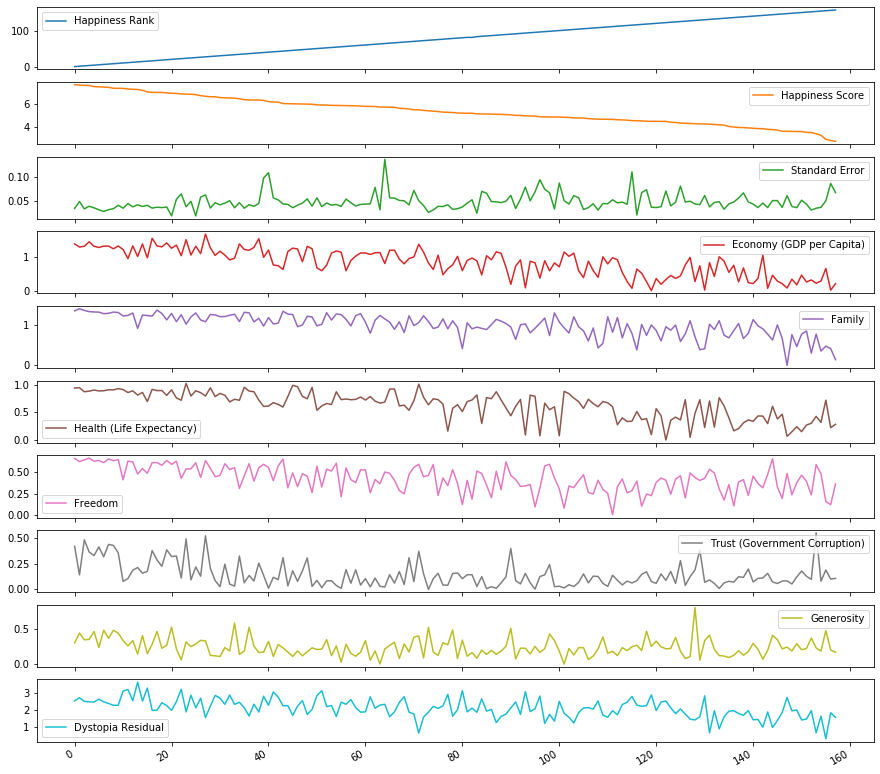

In [26]:
df.plot(subplots = True, figsize=(15,15))

From the below plot, it is clearly understood that people living in Western Europe, North America, Australia & New Zealand have higher GDP and tend to have higher happiness score

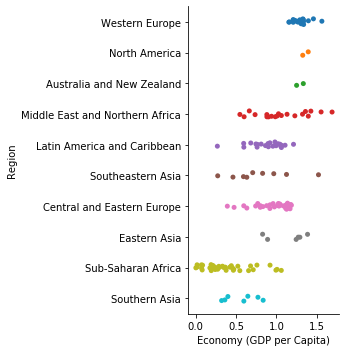

In [31]:
sns.catplot(x = 'Economy (GDP per Capita)', y = 'Region', data = df)

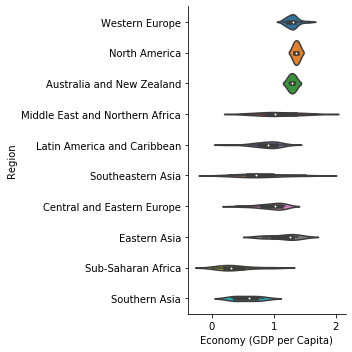

In [33]:
sns.catplot(x = 'Economy (GDP per Capita)', y = 'Region', kind = 'violin', data = df, split = True, )

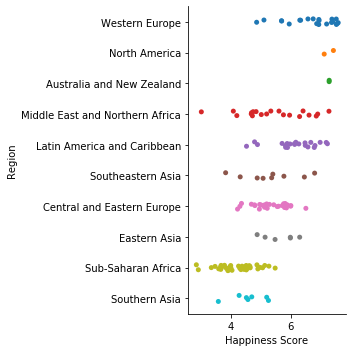

In [34]:
sns.catplot(x = 'Happiness Score', y = 'Region', data = df)

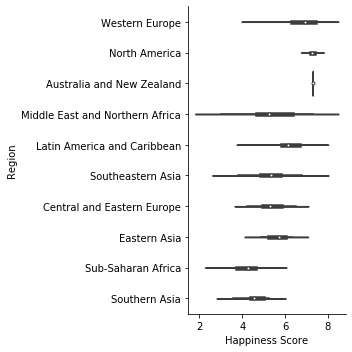

In [42]:
sns.catplot(x = 'Happiness Score', y = 'Region', kind = 'violin', data = df, split = True, )

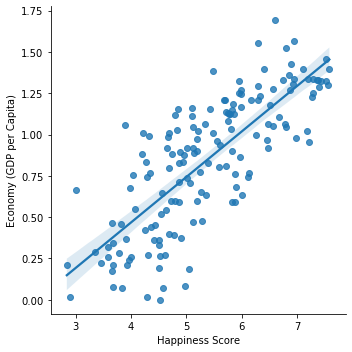

In [43]:
sns.lmplot(x = 'Happiness Score', y= 'Economy (GDP per Capita)', data = df)

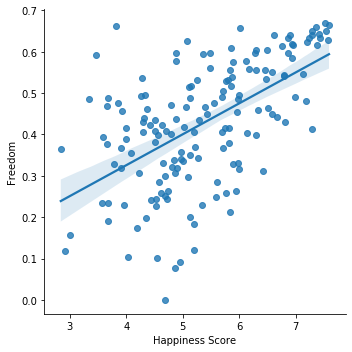

In [44]:
sns.lmplot(x = 'Happiness Score', y= 'Freedom', data = df)

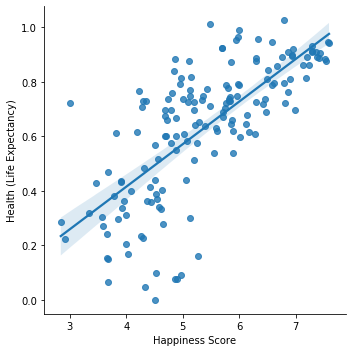

In [45]:
sns.lmplot(x = 'Happiness Score', y= 'Health (Life Expectancy)', data = df)